## Credit Card Fraud Detection

# Question : 


You are required to work on a popular credit card fraud detection dataset from Kaggle. You may download the data from the following site:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud to an external site.

The site also provides a detailed description of the dataset. Note that this is an imbalanced dataset, so it will give you an opportunity to try out things we talked about in class. You should try to reduce the false negatives without compromising too much on the F1-scores. Try the following algorithms (and be sure to account for imbalance using the alternatives discussed in class): Logistic Regression, RandomForest, XGBoost. Create a dataframe that shows the Balanced Accuracy, F1-Score, Precision, and Recall for each of these algorithms.

# Importing all the required libraries 

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix, balanced_accuracy_score 
from sklearn.utils import class_weight
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

# Loading and displaying dataset

In [108]:
# Load the credit card fraud dataset
Data = pd.read_csv('creditcard.csv')
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [109]:
 Data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [122]:
Data.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [143]:
X = Data.drop('Class', axis=1)
y = Data['Class']

In [117]:
# Creating function for scaling
def Standard_Scaler (Data, cols):
    features = Data[cols]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    Data[cols] = features
    return Data

In [118]:
cols = ['Amount']
X = Standard_Scaler (X, cols)

In [144]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [120]:
y_train.value_counts()

0    213233
1       372
Name: Class, dtype: int64

In [121]:
y_test.value_counts()

0    71082
1      120
Name: Class, dtype: int64

As Data is imbalance with high number of transactions which are not fradulent we need to handle the imbalance.

# Undersampling with cluster centroids:

In [123]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train,y_train)


# Apply three algorithms on balanced data using undersampling 

Confusion matrix for Logistic Regression


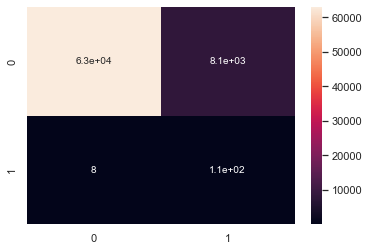

Confusion matrix for Randomforest


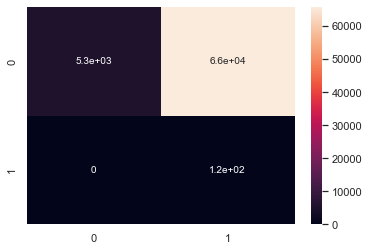

Confusion matrix for XGBoost


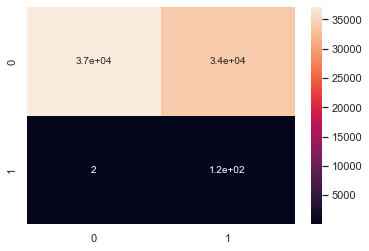

,Balanced Accuracy,F1-Score,Precision,Recall
Logistic Regression,0.910007,0.027030,0.013714,0.933333
RandomForest,0.536985,0.003633,0.001820,1.000000
XGBoost,0.753048,0.006908,0.003466,0.983333


In [124]:
# Training and evaluating Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
lr_acc = balanced_accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
print("Confusion matrix for Logistic Regression")
CF_matrix_LR= confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(CF_matrix_LR)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training and evaluating RandomForest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
rf_acc = balanced_accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
print("Confusion matrix for Randomforest")
CF_matrix_rf= confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(CF_matrix_rf)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training and evaluating XGBoost
xgb = XGBClassifier(random_state=0)
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test)
xgb_acc = balanced_accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)

print("Confusion matrix for XGBoost")
CF_matrix_XG= confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(CF_matrix_XG)
sns.heatmap(cm_df, annot=True)
plt.show()

# Create a dataframe to show the results
results = pd.DataFrame({
    'Balanced Accuracy': [lr_acc, rf_acc, xgb_acc],
    'F1-Score': [lr_f1, rf_f1, xgb_f1],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall]
}, index=['Logistic Regression', 'RandomForest', 'XGBoost'])

display(results)


# Undersampling with   RandomUnderSampler

In [125]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_UR, y_resampled_UR = rus.fit_resample(X_train, y_train)

In [126]:
# Training and evaluating Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(X_resampled_UR, y_resampled_UR)
y_pred = lr.predict(X_test)
lr_acc = balanced_accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)

# Training and evaluating RandomForest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
rf_acc = balanced_accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

# Training and evaluating XGBoost
xgb = XGBClassifier(random_state=0)
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test)
xgb_acc = balanced_accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)

# Create a dataframe to show the results
results = pd.DataFrame({
    'Balanced Accuracy': [lr_acc, rf_acc, xgb_acc],
    'F1-Score': [lr_f1, rf_f1, xgb_f1],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall]
}, index=['Logistic Regression', 'RandomForest', 'XGBoost'])

display(results)


,Balanced Accuracy,F1-Score,Precision,Recall
Logistic Regression,0.933979,0.070345,0.036589,0.908333
RandomForest,0.536985,0.003633,0.001820,1.000000
XGBoost,0.753048,0.006908,0.003466,0.983333


# Handling the imbalance with SMOTE over sampling method

In [127]:
#Importing the Smote and resampling
from imblearn.over_sampling import SMOTE
X_resampled_OS, y_resampled_OS = SMOTE(random_state=0).fit_resample(X_train, y_train)

In [128]:
y_resampled_OS.value_counts()

0    213233
1    213233
Name: Class, dtype: int64

Confusion matrix for Logistic regression


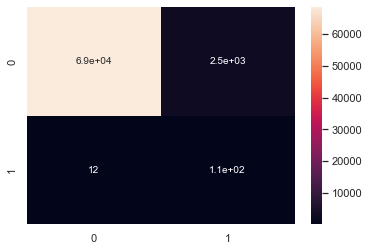

Confusion matrix for Randomforest


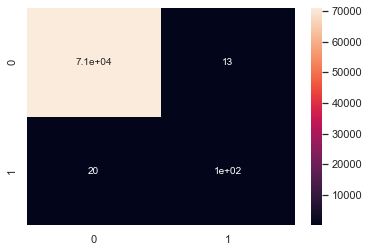

Confusion matrix for XGBoost


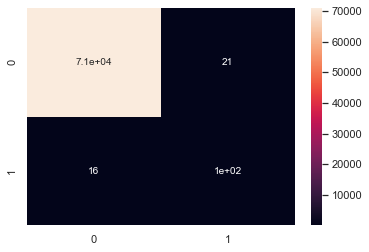

In [134]:
# Training and evaluating Logistic Regression
lr_OS = LogisticRegression(random_state=0)
lr_OS.fit(X_resampled_OS, y_resampled_OS)
y_pred_OS = lr_OS.predict(X_test)
lr_OS_acc = balanced_accuracy_score(y_test, y_pred_OS)
lr_OS_f1 = f1_score(y_test, y_pred_OS)
lr_OS_precision = precision_score(y_test, y_pred_OS)
lr_OS_recall = recall_score(y_test, y_pred_OS)
print("Confusion matrix for Logistic regression")
CF_matrix_LR= confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(CF_matrix_LR)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training and evaluating RandomForest
rf_OS = RandomForestClassifier(random_state=0)
rf_OS.fit(X_resampled_OS, y_resampled_OS)
y_pred_ROS = rf_OS.predict(X_test)
rf_acc_OS = balanced_accuracy_score(y_test, y_pred_ROS)
rf_f1_OS = f1_score(y_test, y_pred_ROS)
rf_precision_OS = precision_score(y_test, y_pred_ROS)
rf_recall_OS = recall_score(y_test, y_pred_ROS)
print("Confusion matrix for Randomforest")
CF_matrix_RF= confusion_matrix(y_test,y_pred_ROS)
cm_df = pd.DataFrame(CF_matrix_RF)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training and evaluating XGBoost
xgb_OS = XGBClassifier(random_state=0)
xgb_OS.fit(X_resampled_OS, y_resampled_OS)
y_pred_XOS = xgb_OS.predict(X_test)
xgb_acc_OS = balanced_accuracy_score(y_test, y_pred_XOS)
xgb_f1_OS = f1_score(y_test, y_pred_XOS)
xgb_precision_OS = precision_score(y_test, y_pred_XOS)
xgb_recall_OS = recall_score(y_test, y_pred_XOS)
CF_matrix_XG= confusion_matrix(y_test,y_pred_XOS)
print("Confusion matrix for XGBoost")
cm_df = pd.DataFrame(CF_matrix_XG)
sns.heatmap(cm_df, annot=True)
plt.show()


In [135]:
# Create a dataframe to show the results
results_OS = pd.DataFrame({
    'Balanced Accuracy': [lr_OS_acc, rf_acc_OS, xgb_acc_OS],
    'F1-Score': [lr_OS_f1, rf_f1_OS, xgb_f1_OS],
    'Precision': [lr_OS_precision, rf_precision_OS, xgb_precision_OS],
    'Recall': [lr_OS_recall, rf_recall_OS, xgb_recall_OS]
}, index=['Logistic Regression', 'RandomForest', 'XGBoost'])

display(results_OS)

,Balanced Accuracy,F1-Score,Precision,Recall
Logistic Regression,0.928658,0.141700,0.077093,0.875000
RandomForest,0.916575,0.858369,0.884956,0.833333
XGBoost,0.933186,0.848980,0.832000,0.866667


# Handling the imbalance using class weights

In [145]:
# Calculate the class weights
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train), y= y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}


Confusion matrix for Logistic regression


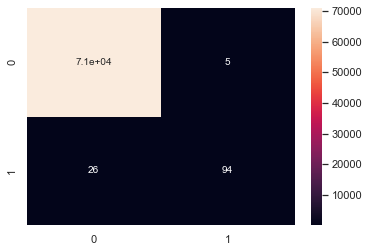

Confusion matrix for Randomforest


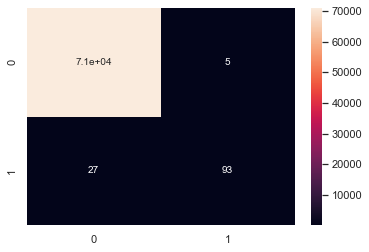

[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Confusion matrix for XGBoost


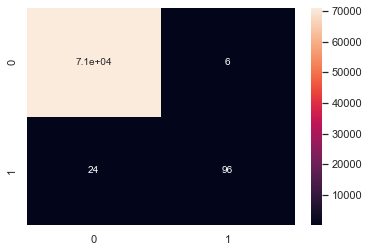

,Balanced Accuracy,F1-Score,Precision,Recall
Logistic Regression,0.932176,0.078204,0.040878,0.900
RandomForest,0.887465,0.853211,0.948980,0.775
XGBoost,0.899958,0.864865,0.941176,0.800


In [146]:
lrw = LogisticRegression(class_weight=class_weights,random_state=0)
lrw.fit(X_train, y_train)
y_pred = lrw.predict(X_test)
lr_acc = balanced_accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
print("Confusion matrix for Logistic regression")
CF_matrix_lr= confusion_matrix(y_test,y_pred)
cm_df_1 = pd.DataFrame(CF_matrix_lr)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training and evaluating RandomForest
rf = RandomForestClassifier(class_weight=class_weights)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = balanced_accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
print("Confusion matrix for Randomforest")
CF_matrix_Rf= confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(CF_matrix_Rf)
sns.heatmap(cm_df, annot=True)
plt.show()

# Training  and evaluating XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = balanced_accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)

CF_matrix_XG= confusion_matrix(y_test,y_pred)
print("Confusion matrix for XGBoost")
cm_df = pd.DataFrame(CF_matrix_XG)
sns.heatmap(cm_df, annot=True)
plt.show()

# Create a dataframe to show the results
results = pd.DataFrame({
    'Balanced Accuracy': [lr_acc, rf_acc, xgb_acc],
    'F1-Score': [lr_f1, rf_f1, xgb_f1],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall]
}, index=['Logistic Regression', 'RandomForest', 'XGBoost'])

display(results)


When Over sampling as imbalance handling technique , Random forest is performing better between three algorithms  with good balanced accuracy and being F1 , precision, recall scores. 
